###Cargamos las librerías

Cargamos nuestras librerías que usaremos en el transcurso del código.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from math import pi

###Función para construir la gráfica

Creamos una función para construir las gáficas cada vez que necesitemos.

In [0]:
def graficar (array_iteraciones, array_error, array_time):
  plt.plot(array_iteraciones, array_error)
  plt.xlabel('Número de iteraciones')
  plt.ylabel('% Error')
  plt.show()

  plt.plot(array_iteraciones, array_error)
  plt.xlabel('Número de iteraciones')
  plt.ylabel('% Error [0%, 1%]')
  plt.ylim(0, 1)
  plt.show()

  plt.plot(array_iteraciones, array_time)
  plt.xlabel('Número de iteraciones')
  plt.ylabel('Tiempo')
  plt.show()

###Función Montercalo - Iteraciones

Esta función implementa el método Montecarlo dependiendo de las iteraciones que el usario le proporcione.

In [0]:
def montecarlo_iteraciones (max_iteraciones):
  
  num = 0
  iteraciones = 0
  tiempo = 0
  error = float()

  array_iteraciones = []
  array_time = []
  array_error = []

  for i in range(max_iteraciones):

    instanteInicial = datetime.now()

    iteraciones += 1
    x = np.random.rand()
    y = np.random.rand()
    
    i = 0

    if (x**2 + y**2) <= 1:
      num += 1
      i += 1
      pi_obtenido = 4 * (num / iteraciones)
      error = (np.abs((pi_obtenido - pi) / pi)) * 100

    instanteFinal = datetime.now()
    tiempo_iteracion = instanteFinal - instanteInicial
    microsegundos = tiempo_iteracion.microseconds
    segundos = microsegundos / 10000
    tiempo += segundos

    array_iteraciones = np.append(array_iteraciones, iteraciones)
    array_time = np.append(array_time, tiempo)
    array_error = np.append(array_error, error)

  print('| Número de iteraciones: ', iteraciones, '| Número de pares: ', num, '| Valor de pi cálculado: ', pi_obtenido, '| %Error: ', error, '| Tiempo: ', tiempo)
  print(pi_obtenido)

  graficar(array_iteraciones, array_error, array_time)

###Función Montercarlo - Error

Esta función implementa el método Montecarlo dependiendo del error esperado.

In [0]:
def montecarlo_error (error_esperado):
  
  pi_obtenido = 0
  num = 0
  iteraciones = 0
  tiempo = 0
  error = 100

  array_iteraciones = []
  array_time = []
  array_error = []

  while error_esperado <= error:

    instanteInicial = datetime.now()

    iteraciones += 1
    x = np.random.rand()
    y = np.random.rand()
    
    if (x**2 + y**2) <= 1:
      num += 1
      pi_obtenido = 4 * (num / iteraciones)
      error = (np.abs((pi_obtenido - pi) / pi)) * 100
    
    instanteFinal = datetime.now()
    tiempo_iteracion = instanteFinal - instanteInicial
    microsegundos = tiempo_iteracion.microseconds
    segundos = microsegundos / 10000
    tiempo += segundos

    array_iteraciones = np.append(array_iteraciones, iteraciones)
    array_time = np.append(array_time, tiempo)
    array_error = np.append(array_error, error)

  print('| Número de iteraciones: ', iteraciones, '| Número de pares: ', num, '| Valor de pi cálculado: ', pi_obtenido, '| %Error: ', error, '| Tiempo: ', tiempo)
  print(pi_obtenido)

  graficar(array_iteraciones, array_error, array_time)

###Montecarlo - Iteraciones

Ahora ejecutamos el códio con 1000000 iteraciones, para ver cuanto tarda y cuantos decimales se acerca al número original

| Número de iteraciones:  1000000 | Número de pares:  785952 | Valor de pi cálculado:  3.143808 | %Error:  0.0705166663690602 | Tiempo:  2311.6033000029406
3.143808


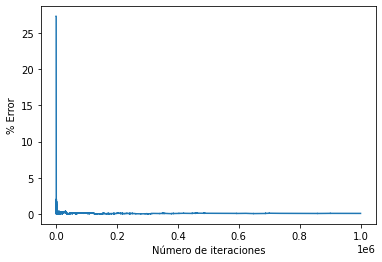

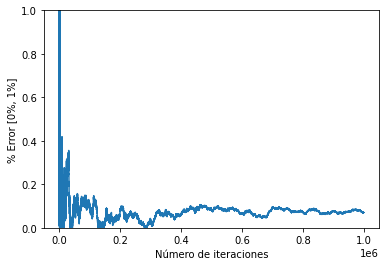

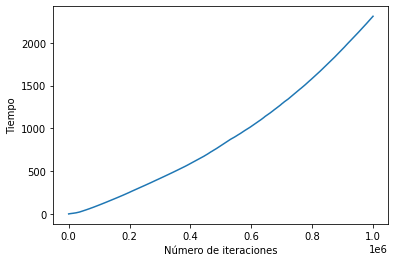

In [0]:
max_iteraciones = 1000000

montecarlo_iteraciones(max_iteraciones)

Como podemos ver, hacerlo por el método de iteraciones es muy ineficiente, demoro alrededor de 35 minutos y solo cálculo dos decimales, con un error del 0.0705, ahora lo que voy a realizar es ejecutar mi función montecarlo que depende del error, siendo este error igual al que me arrojo la anterior ejecución

###Montercarlo - Error

Como mencione anteriormente, ahora ejecutamos el código con un error del 0.0705166663690602, que es el error arrojado por el anterior metódo (por iteraciones), para comparar el tiempo que este demora.

| Número de iteraciones:  14 | Número de pares:  11 | Valor de pi cálculado:  3.142857142857143 | %Error:  0.04024994347707008 | Tiempo:  0.0338
3.142857142857143


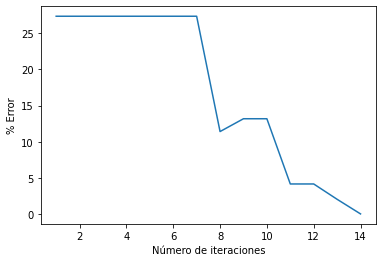

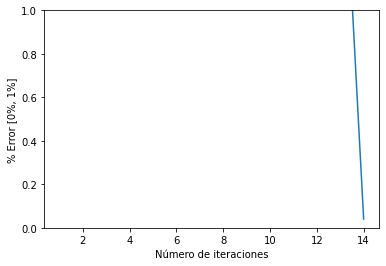

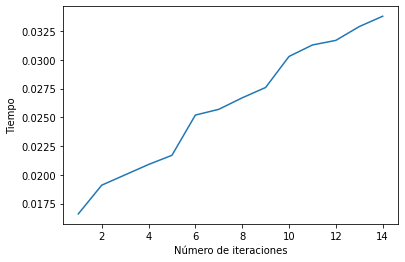

In [0]:
montecarlo_error(0.0705166663690602)

Como podemos ver en las gráficas y las estadísticas arrojadas, ejecutar el método Montecarlo dependiendo del error y no de las iteraciones resulta ser un método más eficiente, tanto en tiempo como en el mismo error, tuvimos un error menor al obtenido por las iteraciones junto con un número mucho menor de estas, siendo 14 en total con un error del 0.04024994347707008%, también es resaltable el tiempo, ya que el algoritmo se demoro en ejecutar solo 0.038 segundos.

##Montecarlo - Error (5 Décimales)

Ahora, viendo que el método Montecarlo dependiendo del error es más eficiente que con iteraciones fijas, buscare cálcular el número PI con 5 décimales de exactitud, ver cuanto tiempo tarda y su número de iteraciones.

| Número de iteraciones:  6561 | Número de pares:  5153 | Valor de pi cálculado:  3.1415942691662857 | %Error:  5.1425396947633925e-05 | Tiempo:  3.860599999999989
3.1415942691662857


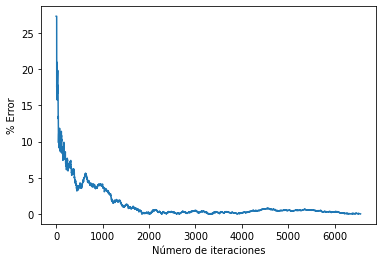

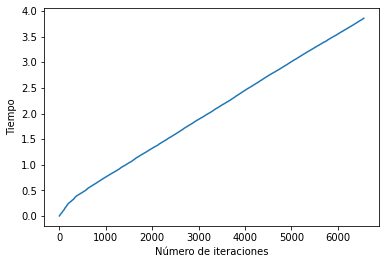

In [0]:
pi_esperado = 3.14159

error_esperado = (np.abs((pi_esperado - pi) / pi)) * 100

montecarlo_error(error_esperado)

Como podemos ver este metódo fue realmente eficiente para encontrar el número PI con 5 décimales de exactitud, nos tomo 6561 iteraciones y alrededor de 4 segundos para llevar a cabo el algortimo.

##Conclusiones y observaciones

- Realizar el método Montecarlo dependiendo de sus iteraciones resulta lento, incierto e ineficiente.

- Aunque el método Montecarlo dependiendo del error resulto ser más eficiente en este caso, sigue siendo incierto ya que depende del azar, puede que haya un momento en que logré ser más ineficiente que realizarlo por iteraciones en cuanto a tiempo de computo, se tendría que realizar más pruebas y obtener datos estadísticos de esta probabilidad.